In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import sys

from sklearn.preprocessing import StandardScaler

In [2]:
assert hasattr(tf, "function") # tester tf 2.0

In [3]:
from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# on ne veut pas le dataset entier
images = images[:10000]
targets = targets[:10000]

print(images.shape)
print(targets.shape)

print(images.mean())
print(images.std())

images = images.reshape(-1, 784)
images = images.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)

images_train, images_test, target_train, target_test = train_test_split(images, targets, test_size=0.2, random_state = 1)

print(images_train.shape, target_train.shape)
print(images_test.shape, target_test.shape)

#print(images.mean())
#print(images.std())

# print(images[0])
# print(target[0])

(10000, 28, 28)
(10000,)
73.00877385204082
90.2745808471392
(8000, 784) (8000,)
(2000, 784) (2000,)


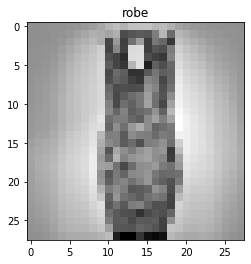

In [4]:
targets_names = ["tshirt", "pantalon", "pull", "robe", "manteau", "sandales",
                 "chemise soin", "basket", "sac", "bottines"]

# on affiche une image
plt.imshow(images[9462].reshape(28, 28), cmap="binary")
plt.title(targets_names[targets[9462]])
plt.show()

In [5]:
print("first line", images[9462][4])

first line -0.061566167073155396


In [6]:
# on va créer le modele, 256 neurones into 128, puis 10 neurones en sortie
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # on passe l'image de hotshot en un seul vecteur, plus besoin avec le truc importé en haut
model.add(tf.keras.layers.Dense(256, activation="relu")) # on crée le premier layer
model.add(tf.keras.layers.Dense(128, activation="relu")) # on crée le second layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) # on crée le layer d'output

model_output = model.predict(images[0:1]) # on fait une predictino sur la premiere image du dataset
print(model_output, targets[0:1])

[[0.05073196 0.00740872 0.40964323 0.00317909 0.01717069 0.01077345
  0.13854708 0.15974069 0.17491493 0.02789005]] [9]


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
# on compile le modele : on utilise telle fonction d'erreur
# sgd = stochistic gradient descent
# sparse pour psa avoir besoin de faire du one-hot

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [9]:
# train the model

history = model.fit(images_train, target_train, epochs = 50, validation_split=0.2)

W0612 15:24:32.102543 13100 deprecation.py:323] From c:\users\timon\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 0s 67us/sample - loss: 0.9288 - accuracy: 0.6916 - val_loss: 0.6511 - val_accuracy: 0.7769
Epoch 2/50
6400/6400 [==============================] - 0s 53us/sample - loss: 0.5531 - accuracy: 0.8017 - val_loss: 0.5527 - val_accuracy: 0.8037
Epoch 3/50
6400/6400 [==============================] - 0s 56us/sample - loss: 0.4627 - accuracy: 0.8422 - val_loss: 0.5060 - val_accuracy: 0.8100
Epoch 4/50
6400/6400 [==============================] - 0s 53us/sample - loss: 0.4103 - accuracy: 0.8581 - val_loss: 0.4743 - val_accuracy: 0.8225
Epoch 5/50
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3727 - accuracy: 0.8706 - val_loss: 0.4629 - val_accuracy: 0.8281
Epoch 6/50
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3444 - accuracy: 0.8816 - val_loss: 0.4509 - val_accuracy: 0.8375
Epoch 7/50
6400/6400 [==============================] - 0s 53us/sample

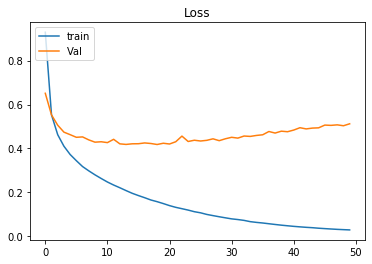

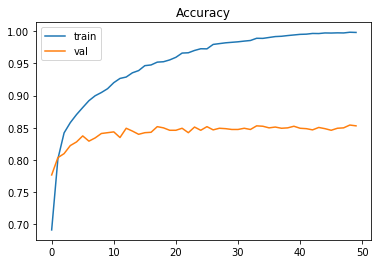

In [10]:

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="train")
plt.plot(loss_val_curve, label="Val")
plt.title("Loss")
plt.legend(loc="upper left")
plt.show()

plt.plot(acc_curve, label="train")
plt.plot(acc_val_curve, label="val")
plt.title("Accuracy")
plt.legend(loc="upper left")
plt.show()

In [12]:
loss, acc = model.evaluate(images_test, target_test)
print("Test loss", loss)
print("Train accuracy", acc)

2000/2000 [==============================] - 0s 39us/sample - loss: 0.5451 - accuracy: 0.8525
Test loss 0.5450860595703125
Train accuracy 0.8525
